## Writing functions for AdvLab 2-Slit Experiment

In [1]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# Function to calculate light intensity, from lab manual
# a = slit width, im mils
a = 0.04064 #in cm
# la = lambda = wavelength, in nm. The red laser is ~670nm in lambda
la = 0.000067 #In cm
# i_0 = I naught = initial intensity which is 5mW over a 1 cmsquared photodiode
i_0 = 0.005 # converted mW/cm^2 to W/cm^2

def I_one(a, la, i_0, theta):
    """calculates intensity for portion of diffraction pattern.
    a, la, and i_0 should be known and theta represents the changing angle of evaluation."""
    numerator = math.sin(((math.pi * a)/la)*math.sin(theta))
    denom = (math.pi/la)*math.sin(theta)

    I = i_0 * (numerator)/(denom)
#     print("Intensity:", I, "W/cm^2")
    return I

In [3]:
# Function to calculate light intensity, two slit
# Many of the same constants used above will be used here
# 2slit separation (d) is 16 mils. 
d = 0.04064
def I_two(a, la, i_o, d, theta):
    """calculates intensity for portion of diffraction pattern.
    a, la, d,  and i_0 should be known and theta represents the changing angle of evaluation."""
    p1 = 4*i_0*math.cos((math.pi*d)/(la) * math.sin(theta))**(2)
    p2_num = math.sin((math.pi*a)/(la) * math.sin(theta))
    p2_denom = (math.pi/la * math.sin(theta))
    I_two = p1 * (p2_num/p2_denom)**(2)
    
    return I_two

In [218]:
I_two(a, la, i_0, d, math.pi)

3.303219200000002e-05

In [4]:
exel = pd.ExcelFile("/Users/andrewwinhold/Desktop/2 Slit Interference Dataset 2.xlsx.xlsx")

In [5]:
exel.sheet_names

['part4h-slitb-bump-bulb8-950',
 'slit-a-bump-blub8-950-second',
 'Final 4h-both-bulb8-950',
 'final laser bothslits-920',
 'final laser slitB-lump2-920',
 'final laser slitA-lump1-920']

In [6]:
df_dos = exel.parse('final laser bothslits-920')
df_unoA = exel.parse('final laser slitA-lump1-920')
df_unoB = exel.parse('final laser slitB-lump2-920')
df_single = exel.parse('Final 4h-both-bulb8-950')

### Double Slit Evaluation

In [245]:
df_dos.head()

,Time(sec),Angle(V),Diode(V),cps
0,0.0,0.00433,0.454,0
1,0.6,0.00850,0.527,0
2,0.7,0.01170,0.572,0
3,0.8,0.01410,0.592,0
4,0.9,0.01800,0.602,0


In [8]:
# Converting from pandas dataframe to numpy array
angmat = df_dos['Angle(V)'].as_matrix()
diomat = df_dos['Diode(V)'].as_matrix()

angmatunoA = df_unoA['Angle(V)'].as_matrix()
diomatunoA = df_unoA['Diode(V)'].as_matrix()

angmatunoB = df_unoB['Angle(V)'].as_matrix()
diomatunoB = df_unoB['Diode(V)'].as_matrix()

angmatbulb = df_single['Angle(V)'].as_matrix()
diomatbulb = df_single['Diode(V)'].as_matrix()

In [ ]:
# This might not be necessary, its late.
# changing diode matrix from its previous value (assumed to be radians) to degrees.
for i in range(201):
    diomat[i] = math.degrees(diomat[i])

In [18]:
thertr2 = np.linspace(-.3,.3, 202)  
theoretical2 = np.zeros([202,])
for i in range(201):
    theoretical2[i] = I_two(a, la, i_0, d, thertr2[i])

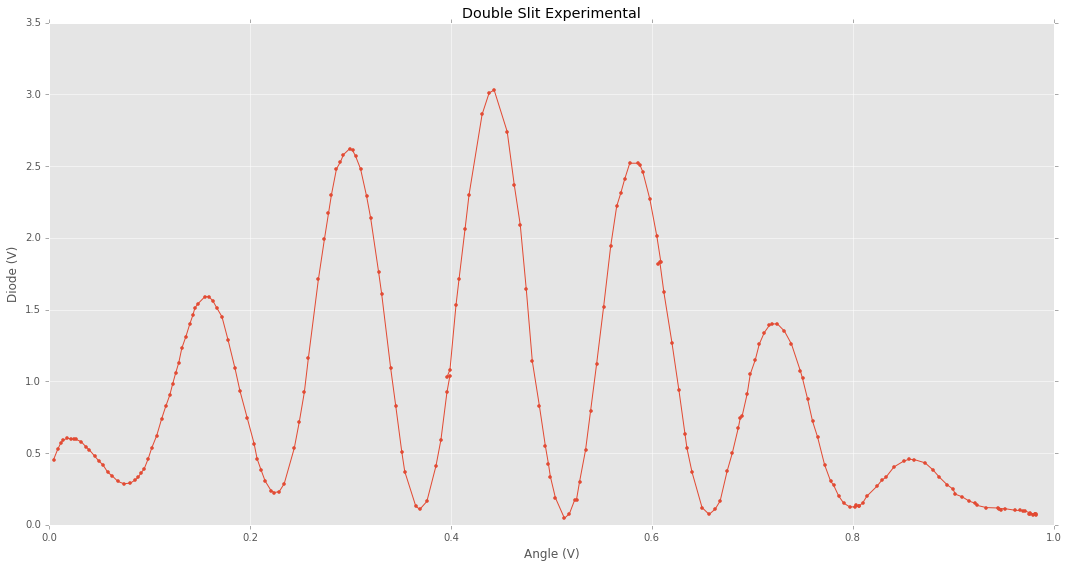

In [16]:
fig, ax = plt.subplots(1, figsize=(18,9))
ax.plot(df_dos['Angle(V)'],diomat, marker='.')
# ax.plot(df['Angle(V)'], theoretical2, marker='.')
ax.set_title('Double Slit Experimental')
ax.set_xlabel('Angle (V)')
ax.set_ylabel('Diode (V)')
# fig.savefig('double-slit-experimental-plot.png')

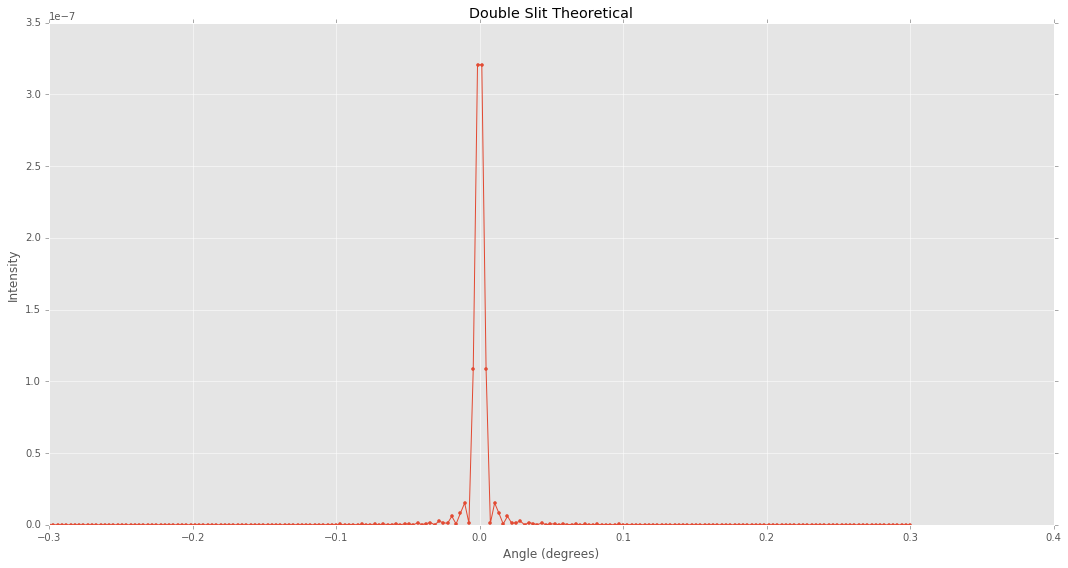

In [19]:
fig, ax = plt.subplots(1, figsize=(18,9))
ax.plot(thertr2, theoretical2, marker='.')
ax.set_title('Double Slit Theoretical')
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Intensity')
# fig.savefig('double-slit-theoretical-plot.png')

### Single Slit Evaluation - Slit A

In [20]:
thertr = np.linspace(-.3,.3, 202)
theoretical = np.zeros([202,])
for i in range(201):
    theoretical[i] = I_one(a, la, i_0, thertr[i])  

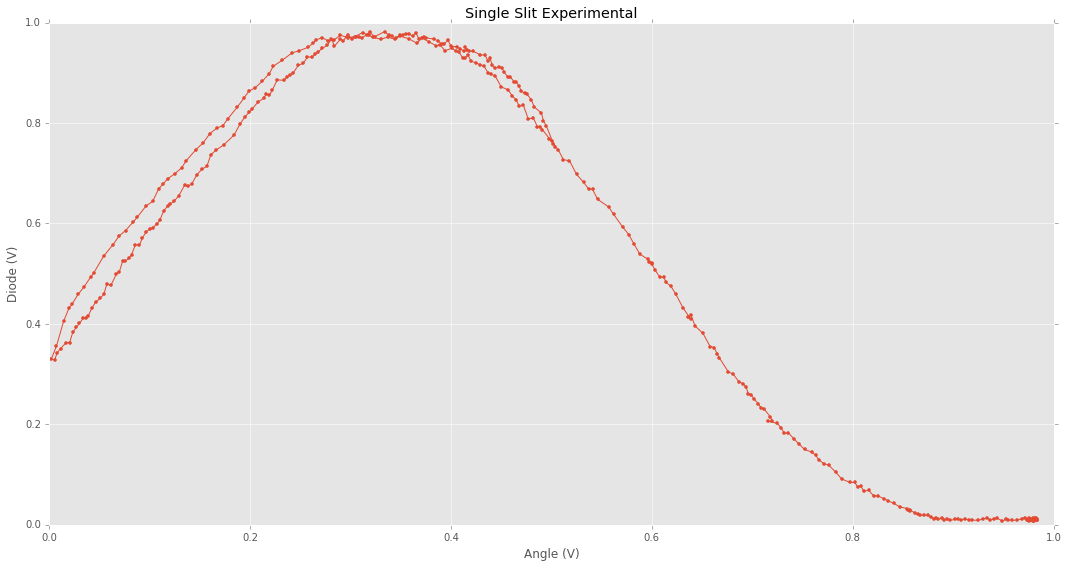

In [23]:
fig, ax = plt.subplots(1, figsize=(18,9))
ax.plot(df_unoA['Angle(V)'],diomatunoA, marker='.')
ax.set_title('Single Slit Experimental')
ax.set_xlabel('Angle (V)')
ax.set_ylabel('Diode (V)')
# fig.savefig('single-slit-A-experimental-plot.png')

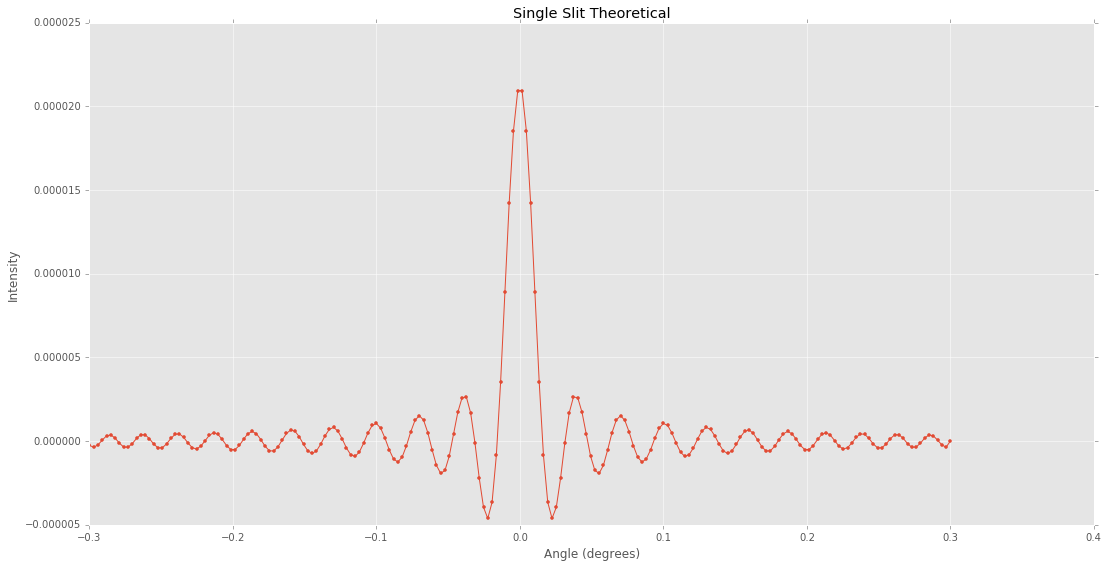

In [22]:
fig, ax = plt.subplots(1, figsize=(18,9))
ax.plot(thertr, theoretical, marker='.')
ax.set_title('Single Slit Theoretical')
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Intensity')
# fig.savefig('single-slit-theoretical-plot.png')

### Slit B

In [24]:
thertr = np.linspace(-.3,.3, 202)
theoretical = np.zeros([202,])
for i in range(201):
    theoretical[i] = I_one(a, la, i_0, thertr[i])

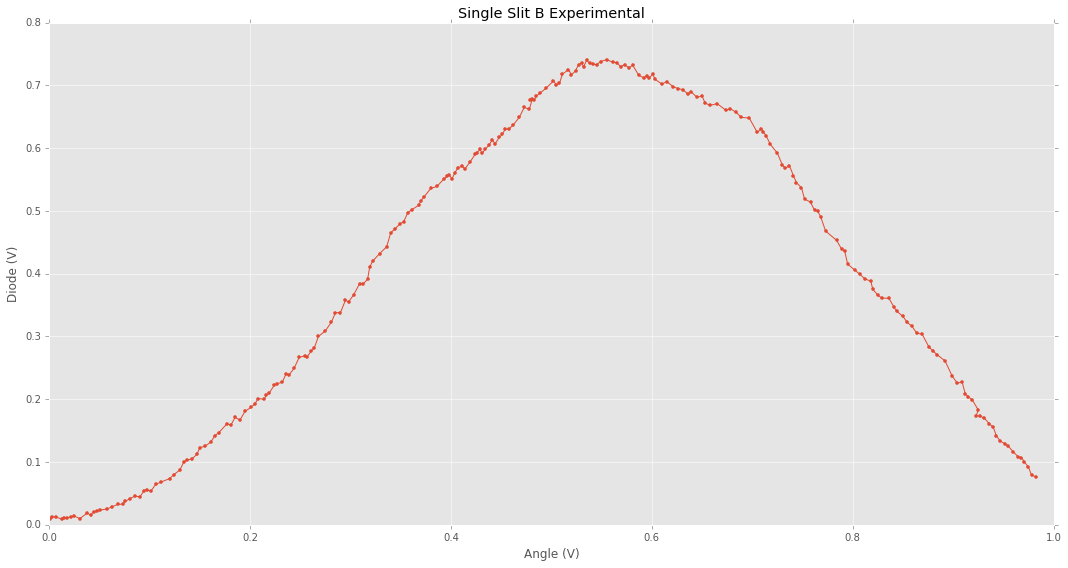

In [25]:
fig, ax = plt.subplots(1, figsize=(18,9))
ax.plot(df_unoB['Angle(V)'],diomatunoB, marker='.')
ax.set_title('Single Slit B Experimental')
ax.set_xlabel('Angle (V)')
ax.set_ylabel('Diode (V)')
# fig.savefig('single-slit-B-experimental-plot.png')

### Single Photon

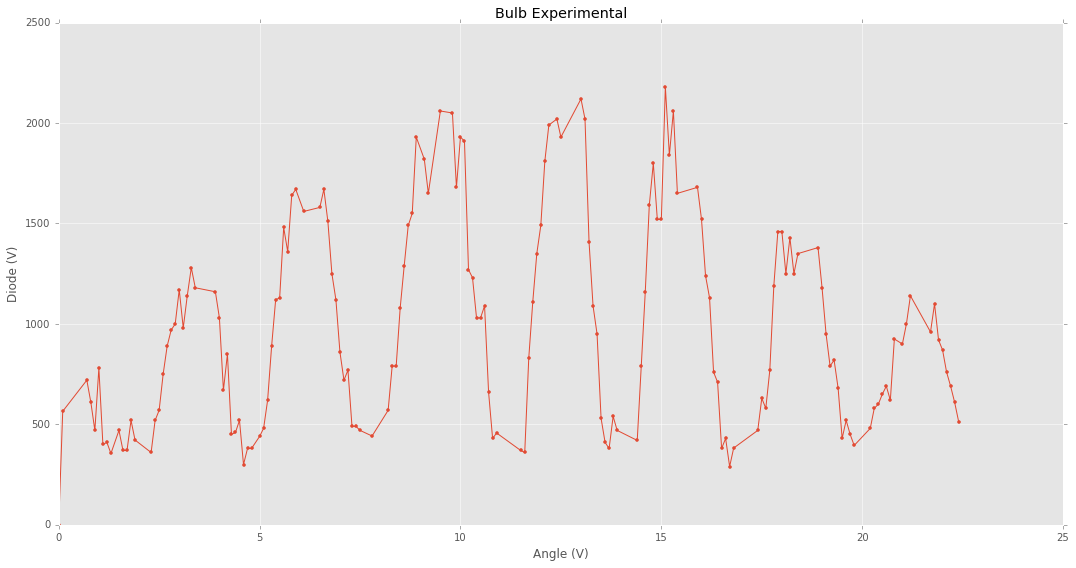

In [26]:
fig, ax = plt.subplots(1, figsize=(18,9))
ax.plot(df_single['Time(sec)'],df_single['cps'], marker='.')
ax.set_title('Bulb Experimental')
ax.set_xlabel('Angle (V)')
ax.set_ylabel('Diode (V)')
# fig.savefig('twoslit-singlephoton-bulb.png')